In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import re
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder
from sklearn.model_selection import train_test_split

# Load the Dataset

In [9]:
# Read the CSV file
df_raw = pd.read_csv(r"data\movies_metadata.csv")

df_raw.head(5)

C:\Users\Tina\AppData\Local\Temp\ipykernel_15228\3016288355.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(r"data\movies_metadata.csv")


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [43]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

# Data Preparation

### 1. Drop Unnecessary Columns

In [44]:
df_movies_metadata = df_raw.loc[:, ~df_raw.columns.isin(['adult', 'homepage','imdb_id', 'original_title', 'poster_path', 'spoken_languages', 'status', 'video'])]

In [45]:
df_movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4494 non-null   object 
 1   budget                 45466 non-null  object 
 2   genres                 45466 non-null  object 
 3   id                     45466 non-null  object 
 4   original_language      45455 non-null  object 
 5   overview               44512 non-null  object 
 6   popularity             45461 non-null  object 
 7   production_companies   45463 non-null  object 
 8   production_countries   45463 non-null  object 
 9   release_date           45379 non-null  object 
 10  revenue                45460 non-null  float64
 11  runtime                45203 non-null  float64
 12  tagline                20412 non-null  object 
 13  title                  45460 non-null  object 
 14  vote_average           45460 non-null  float64
 15  vo

### 2. Change data types to correct data types

First, we need to change the columns budget, popularity and release date to their appropriate data types. 

In [46]:
df_movies_metadata['budget'] = pd.to_numeric(df_movies_metadata['budget'], errors='coerce')
df_movies_metadata['id'] = pd.to_numeric(df_movies_metadata['id'], errors='coerce', downcast='integer')
df_movies_metadata['popularity'] = pd.to_numeric(df_movies_metadata['popularity'], errors='coerce')
df_movies_metadata['release_date'] = pd.to_datetime(df_movies_metadata['release_date'], format = "%Y-%m-%d", errors='coerce')

C:\Users\bluec\AppData\Local\Temp\ipykernel_5620\1280540771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies_metadata['budget'] = pd.to_numeric(df_movies_metadata['budget'], errors='coerce')
C:\Users\bluec\AppData\Local\Temp\ipykernel_5620\1280540771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies_metadata['id'] = pd.to_numeric(df_movies_metadata['id'], errors='coerce', downcast='integer')
C:\Users\bluec\AppData\Local\Temp\ipykernel_5620\1280540771.py:3: SettingWithCopyWarning: 
A

### 3. Filter out rows with invalid data

There are some movies without revenue or budget data. We also assume that any 0 values are input errors or missing data. We should filter out these rows. 

Since we will later be joining the cast, director and keywords data using id, we should also check for duplicates in the id column.

In [47]:
df_movies_metadata.dropna(axis=0, subset=['budget', 'revenue', 'release_date', 'id'], inplace=True)
df_nodup = df_movies_metadata.drop_duplicates(subset=['id'])
df_nozero = df_nodup[(df_nodup['revenue'] >0) & (df_nodup['budget'] >0)]


C:\Users\bluec\AppData\Local\Temp\ipykernel_5620\1931413515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies_metadata.dropna(axis=0, subset=['budget', 'revenue', 'release_date', 'id'], inplace=True)


In [48]:
df_nozero['year'] = df_nozero['release_date'].dt.year
df_nozero['quarter'] = df_nozero['release_date'].dt.quarter

C:\Users\bluec\AppData\Local\Temp\ipykernel_5620\3794693632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nozero['year'] = df_nozero['release_date'].dt.year
C:\Users\bluec\AppData\Local\Temp\ipykernel_5620\3794693632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nozero['quarter'] = df_nozero['release_date'].dt.quarter


In [49]:
df_nozero.head(6)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,tagline,title,vote_average,vote_count,year,quarter
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862.0,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,NaN,Toy Story,7.7,5415.0,1995,4
1,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844.0,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995,4
3,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357.0,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,1995,4
5,NaN,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949.0,en,"Obsessive master thief, Neil McCauley leads a ...",17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,A Los Angeles Crime Saga,Heat,7.7,1886.0,1995,4
8,NaN,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091.0,en,International action superstar Jean Claude Van...,5.231580,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,64350171.0,106.0,Terror goes into overtime.,Sudden Death,5.5,174.0,1995,4
9,"{'id': 645, 'name': 'James Bond Collection', '...",58000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710.0,en,James Bond must unmask the mysterious head of ...,14.686036,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,352194034.0,130.0,No limits. No fears. No substitutes.,GoldenEye,6.6,1194.0,1995,4


In [50]:
df_nozero.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5375 entries, 0 to 45422
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  1223 non-null   object        
 1   budget                 5375 non-null   float64       
 2   genres                 5375 non-null   object        
 3   id                     5375 non-null   float64       
 4   original_language      5375 non-null   object        
 5   overview               5364 non-null   object        
 6   popularity             5375 non-null   float64       
 7   production_companies   5375 non-null   object        
 8   production_countries   5375 non-null   object        
 9   release_date           5375 non-null   datetime64[ns]
 10  revenue                5375 non-null   float64       
 11  runtime                5374 non-null   float64       
 12  tagline                4625 non-null   object        
 13  title  

We are now left with 5375 movies with valid budget, revenue and release date information.

### 4. Exclude very old data points and adjust for inflation

According to the [data dictionary](https://www.themoviedb.org/bible/movie#59f73b759251416e71000007), revenue and budget are in USD and are not adjusted for inflation. As such, we use the global inflation data from [Macrotrends](https://www.macrotrends.net/countries/WLD/world/inflation-rate-cpi#:~:text=World%20inflation%20rate%20for%202021,a%200.25%25%20increase%20from%202017.) to adjust for inflation. As data is only available from 1981, we will filter out movies released before 1981. From the histrogram below, we can see that the bulk of the movies were released from the 1980s onward.

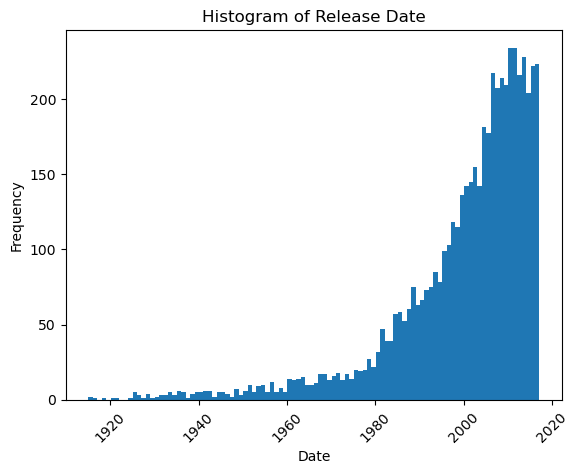

In [51]:
# Plot histogram of movie release dates
interval = pd.DateOffset(months=12)  # Set interval to 1 month

plt.hist(df_nozero['release_date'], bins=pd.date_range(start=df_nozero['release_date'].min(), end=df_nozero['release_date'].max(), freq=interval))
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Release Date')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

In [52]:
df_filtered = df_nozero[df_nozero['year'] > 1980]
len(df_filtered)

4847

In [3]:
#import inflation data
df_inflation = pd.read_csv(r"data\global_annual_inflation.csv")

df_inflation.head()

,Year,Inflation Rate
0,2021,0.0350
1,2020,0.0192
2,2019,0.0219
3,2018,0.0244
4,2017,0.0219


The latest release date in the dataset is 2017. The following code adjusts all revenue and budget figures into 2018 dollars.

In [54]:
inflation = df_inflation[(df_inflation['Year'] <=2019)]
inflation['Inflation Rate'] = inflation['Inflation Rate'] +1
inflation.loc[2, 'Inflation Rate'] =1 
inflation['convto2018'] = np.cumprod(inflation['Inflation Rate'])
inflation['convto2018'] = inflation['convto2018'].shift(periods=1)


C:\Users\bluec\AppData\Local\Temp\ipykernel_5620\1008099294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflation['Inflation Rate'] = inflation['Inflation Rate'] +1
C:\Users\bluec\AppData\Local\Temp\ipykernel_5620\1008099294.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflation['convto2018'] = np.cumprod(inflation['Inflation Rate'])
C:\Users\bluec\AppData\Local\Temp\ipykernel_5620\1008099294.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [55]:
df_inf = df_filtered.merge(how='left', right=inflation, left_on='year', right_on='Year')
df_inf['budget_adj'] = df_inf['budget'] * df_inf['convto2018']
df_inf['revenue_adj'] = df_inf['revenue'] * df_inf['convto2018']

In [56]:
df_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  1114 non-null   object        
 1   budget                 4847 non-null   float64       
 2   genres                 4847 non-null   object        
 3   id                     4847 non-null   float64       
 4   original_language      4847 non-null   object        
 5   overview               4836 non-null   object        
 6   popularity             4847 non-null   float64       
 7   production_companies   4847 non-null   object        
 8   production_countries   4847 non-null   object        
 9   release_date           4847 non-null   datetime64[ns]
 10  revenue                4847 non-null   float64       
 11  runtime                4846 non-null   float64       
 12  tagline                4156 non-null   object        
 13  tit

### 5. One Hot Encoding for JSON and categorial columns

The genres column is currently in json format. The following code extracts all the genre names into a list, then uses the MultiLabelBinarizer from sklearn to apply one hot encoding on the genres.

In [57]:
df_inf['genres']

0       [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1       [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2       [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
3       [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
4       [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
                              ...                        
4842    [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...
4843    [{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...
4844    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4845    [{'id': 10749, 'name': 'Romance'}, {'id': 18, ...
4846    [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...
Name: genres, Length: 4847, dtype: object

In [58]:
df_inf['genres_clean'] = df_inf['genres'].apply(lambda x: re.findall("'name': '(\w+)'", x))

In [59]:
mlb = MultiLabelBinarizer()
mlb.fit(df_inf['genres_clean'])

genres_transformed = mlb.fit_transform(df_inf['genres_clean'])
genres = pd.DataFrame(genres_transformed, columns = mlb.classes_)

print(mlb.classes_)

['Action' 'Adventure' 'Animation' 'Comedy' 'Crime' 'Documentary' 'Drama'
 'Family' 'Fantasy' 'Foreign' 'History' 'Horror' 'Music' 'Mystery'
 'Romance' 'Thriller' 'War' 'Western']


The original_language column is single-value. However, since there are likely many different languages and we will only encode the top 10 languages and the rest will be encoded as others.

In [60]:
df_inf['original_language']

0       en
1       en
2       en
3       en
4       en
        ..
4842    ta
4843    ru
4844    en
4845    en
4846    ru
Name: original_language, Length: 4847, dtype: object

In [61]:
lang_ohe = OneHotEncoder(sparse_output=False, max_categories=11)
lang_ohe.fit(df_inf[['original_language']])

lang_transformed = lang_ohe.fit_transform(df_inf[['original_language']])
lang = pd.DataFrame(lang_transformed, columns = lang_ohe.get_feature_names_out())
lang.rename(columns={"original_language_infrequent_sklearn": "original_language_others"}, inplace=True)

The production_companies column is multi-value like genre. Since the multi label binarizer does not have an in-build capability to group infrequent categories, we cannot use it to do encoding for this column.

In [62]:
df_inf['production_companies']

0          [{'name': 'Pixar Animation Studios', 'id': 3}]
1       [{'name': 'TriStar Pictures', 'id': 559}, {'na...
2       [{'name': 'Twentieth Century Fox Film Corporat...
3       [{'name': 'Regency Enterprises', 'id': 508}, {...
4       [{'name': 'Universal Pictures', 'id': 33}, {'n...
                              ...                        
4842           [{'name': 'AVM Productions', 'id': 16424}]
4843    [{'name': 'Кинокомпания «Lunapark»', 'id': 420...
4844                                                   []
4845                    [{'name': 'Profit', 'id': 21163}]
4846                                                   []
Name: production_companies, Length: 4847, dtype: object

In [63]:
#extract company names
companies  = df_inf['production_companies'].apply(lambda x: re.findall("'name': '([\w\s,\.\(\-\)&]+)', 'id':", x))

#flatten into a single list
companies_flat = [x.rstrip(" ") for i in companies for x in i]

#extract names of 10 companies with most movies
company_counts = pd.Series(companies_flat).value_counts()
top10_companies = company_counts[0:10].index.tolist()
top10_companies

['Warner Bros.',
 'Universal Pictures',
 'Paramount Pictures',
 'Twentieth Century Fox Film Corporation',
 'Columbia Pictures',
 'New Line Cinema',
 'Walt Disney Pictures',
 'Touchstone Pictures',
 'Relativity Media',
 'Metro-Goldwyn-Mayer (MGM)']

In [64]:
#create 4847 x 11 matrix to hold one hot encoding values
companies_clean = [[0 for _ in range(11)] for _ in range(len(df_inf))]

for i in range(len(df_inf)):
    for j in companies[i]:
        for k in range(10):
            if j==top10_companies[k]:
                companies_clean[i][k] = 1
            else:
                companies_clean[i][10] = 1

companies_clean_df = pd.DataFrame(np.asarray(companies_clean), columns = top10_companies + ["Other Prod"])
companies_clean_df.head()

,Warner Bros.,Universal Pictures,Paramount Pictures,Twentieth Century Fox Film Corporation,Columbia Pictures,New Line Cinema,Walt Disney Pictures,Touchstone Pictures,Relativity Media,Metro-Goldwyn-Mayer (MGM),Other Prod
0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,1


In [65]:
df_inf['prod'] = df_inf['production_companies'].apply(lambda x: re.search("'name': '([\w\s,\.\(\-\)&]+)', 'id':", x))

We apply the same treatent to production countries.

In [66]:
df_inf['production_countries'][0]

"[{'iso_3166_1': 'US', 'name': 'United States of America'}]"

In [67]:
#extract company names
countries  = df_inf['production_countries'].apply(lambda x: re.findall("'name': '([\w\s,\.\(\-\)&]+)'", x))

#flatten into a single list
countries_flat = [x.rstrip(" ") for i in countries for x in i]

#extract names of 10 companies with most movies
country_counts = pd.Series(countries_flat).value_counts()
top10_countries = country_counts[0:10].index.tolist()
top10_countries

['United States of America',
 'United Kingdom',
 'France',
 'Germany',
 'Canada',
 'India',
 'Australia',
 'Italy',
 'Russia',
 'Japan']

In [68]:
#create 4847 x 11 matrix to hold one hot encoding values
countries_clean = [[0 for _ in range(11)] for _ in range(len(df_inf))]

for i in range(len(df_inf)):
    for j in countries[i]:
        for k in range(10):
            if j==top10_countries[k]:
                countries_clean[i][k] = 1
            else:
                countries_clean[i][10] = 1

countries_clean_df = pd.DataFrame(np.asarray(countries_clean), columns = top10_countries + ["Other Country"])
countries_clean_df.head()

,United States of America,United Kingdom,France,Germany,Canada,India,Australia,Italy,Russia,Japan,Other Country
0,1,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,1


Similarly, the quarter column will also need to be one hot encoded.

In [69]:
q_ohe = OneHotEncoder(sparse_output=False)
q_ohe.fit(df_inf[['quarter']])

q_transformed = q_ohe.fit_transform(df_inf[['quarter']])
q = pd.DataFrame(q_transformed, columns = q_ohe.get_feature_names_out())

q.head()

,quarter_1,quarter_2,quarter_3,quarter_4
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


The column belong_to_collection gives the series/franchise name if a movie is part of a series. We will create a column to indicate if a movie is part of a series, and one for the number of movies in the series.

In [70]:
df_inf['belongs_to_collection'][0:2]

0    {'id': 10194, 'name': 'Toy Story Collection', ...
1                                                  NaN
Name: belongs_to_collection, dtype: object

In [71]:
df_inf['belongs_to_collection'] = df_inf['belongs_to_collection'].apply(lambda x: "NaN" if pd.isnull(x) else x)
df_inf['belongs_to_collection'] = df_inf['belongs_to_collection'].apply(lambda x: re.findall("'name': '([\w\s,\.\(\-\)&]+)',", x))

In [72]:
collections_flat = [x.rstrip(" ") for i in df_inf['belongs_to_collection'] for x in i]

collections_counts = pd.Series(collections_flat).value_counts()

In [73]:
collections_counts

James Bond Collection                   14
Friday the 13th Collection              11
The Fast and the Furious Collection      8
A Nightmare on Elm Street Collection     8
Harry Potter Collection                  8
                                        ..
S.W.A.T. Collection                      1
Hard Target Collection                   1
Wrong Turn Collection                    1
House of 1000 Corpses Collection         1
Mommies Collection                       1
Name: count, Length: 558, dtype: int64

In [74]:
series_clean = [0 for _ in range(len(df_inf))]

for i in range(len(df_inf)):
    for j in df_inf.loc[i, 'belongs_to_collection']:
        for k in range(len(collections_counts)):
            if j== collections_counts.index[k]:
                series_clean[i] += collections_counts[k]


series_clean_df = pd.DataFrame(np.asarray(series_clean), columns = ["series_num"])
#collection with only 1 movie is not considered a series
series_clean_df['series_num'].replace(1, 0, inplace=True)
series_clean_df['series_ind'] = np.where(series_clean_df['series_num']>0, 1, 0)


In [75]:
series_clean_df

,series_num,series_ind
0,3,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
4842,0,0
4843,0,0
4844,0,0
4845,0,0


Lastly, we join the newly created encoded variables to the data.

In [76]:
df_encoded = pd.concat([df_inf, genres, lang, companies_clean_df, countries_clean_df, q, series_clean_df], axis=1)
df_encoded.head(6)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,Italy,Russia,Japan,Other Country,quarter_1,quarter_2,quarter_3,quarter_4,series_num,series_ind
0,[Toy Story Collection],30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862.0,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,...,0,0,0,1,0.0,0.0,0.0,1.0,3,1
1,[],65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844.0,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,...,0,0,0,1,0.0,0.0,0.0,1.0,0,0
2,[],16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357.0,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,0,0,0,1,0.0,0.0,0.0,1.0,0,0
3,[],60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949.0,en,"Obsessive master thief, Neil McCauley leads a ...",17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,...,0,0,0,1,0.0,0.0,0.0,1.0,0,0
4,[],35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091.0,en,International action superstar Jean Claude Van...,5.231580,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,0,0,0,1,0.0,0.0,0.0,1.0,0,0
5,[James Bond Collection],58000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710.0,en,James Bond must unmask the mysterious head of ...,14.686036,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,...,0,0,0,1,0.0,0.0,0.0,1.0,14,1


In [77]:
len(df_encoded)

4847

### 6. Join Top100 Cast Counts and Top100 Directors

Next, we join the counts of popular cast ([IMDB top 100 stars](https://www.imdb.com/chart/starmeter/), directors [update source please]()) and total cast. The cast and directors were pre-processed in the extracting_cast_match_top100 notebook.

In [4]:
#load preprocessed counts
cast_count = pd.read_csv(r"data\total_cast_count.csv")
cast_count1 = cast_count.drop_duplicates(subset=['id'])
cast_count1.head()


,Unnamed: 0,id,total_cast
0,0,862,13
1,1,8844,26
2,2,15602,7
3,3,31357,10
4,4,11862,12


In [5]:
pop_cast = pd.read_csv(r"data\cast_match with top100.csv")
pop_cast1 = pop_cast.drop_duplicates(subset=['id'])
pop_cast1.head()

,Unnamed: 0.1,Unnamed: 0,id,total_popular_cast,popular,Justine Lupe,Tom Holland,Elizabeth Olsen,Richard Madden,Ben Affleck,...,Will Poulter,Karen Gillan,Ana de Armas,Sydney Sweeney,Riley Keough,Clint Eastwood,Teresa Palmer,Ryan Gosling,Alexander SkarsgÃ¥r,top_director
0,0,0,862,1,popular,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,8844,0,not popular,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,15602,0,not popular,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,31357,0,not popular,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,11862,1,popular,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
pop_cast2 = pop_cast1.merge(how="left", right=cast_count1, on='id')

In [81]:
df_cast = df_encoded.merge(how='left', right=pop_cast2[['id','total_popular_cast', 'top_director', 'total_cast']], 
                           on='id', validate= 'one_to_one')

df_cast.head(6)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,Other Country,quarter_1,quarter_2,quarter_3,quarter_4,series_num,series_ind,total_popular_cast,top_director,total_cast
0,[Toy Story Collection],30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862.0,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,...,1,0.0,0.0,0.0,1.0,3,1,1,1,13
1,[],65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844.0,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,...,1,0.0,0.0,0.0,1.0,0,0,0,0,26
2,[],16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357.0,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,1,0.0,0.0,0.0,1.0,0,0,0,0,10
3,[],60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949.0,en,"Obsessive master thief, Neil McCauley leads a ...",17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,...,1,0.0,0.0,0.0,1.0,0,0,1,1,65
4,[],35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091.0,en,International action superstar Jean Claude Van...,5.231580,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,1,0.0,0.0,0.0,1.0,0,0,0,0,6
5,[James Bond Collection],58000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710.0,en,James Bond must unmask the mysterious head of ...,14.686036,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,...,1,0.0,0.0,0.0,1.0,14,1,0,0,20


Check for any null values for the merged popular cast and director data.

In [82]:
df_cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 85 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   belongs_to_collection                   4847 non-null   object        
 1   budget                                  4847 non-null   float64       
 2   genres                                  4847 non-null   object        
 3   id                                      4847 non-null   float64       
 4   original_language                       4847 non-null   object        
 5   overview                                4836 non-null   object        
 6   popularity                              4847 non-null   float64       
 7   production_companies                    4847 non-null   object        
 8   production_countries                    4847 non-null   object        
 9   release_date                            4847 non-nul

### 7. Drop Unnecessary Columns

Lastly, check the columns that we have now and drop those that are not needed, and split it into training and test datasets.

In [83]:
df_final = df_cast.loc[:, ~df_cast.columns.isin(['budget', 'revenue', 'genres', 'original_language', 'production_companies', 
                                                 'production_countries', 'Year', "Inflation Rate", "convto2018", "genres_clean",
                                                 'prod', 'quarter', 'popularity'])]

In [84]:
train, test = train_test_split(df_final, test_size=0.3, random_state=2023)
train.to_csv(r'data\topic_model_train.csv')
test.to_csv(r'data\topic_model_test.csv')

In [85]:
print(len(train), len(test))

3392 1455


### 8. Merge with Topics from Topic Modeling

Topic modelling was conducted using the movie keyword dataset and the title, tagline and overview variables from the main metadata dataset. Refer to topic_modelling notebook. 

The following code performs one hot encoding on the topics.

In [6]:
train_topic = pd.read_csv(r"data\train_dataframe_topics_final.csv")
test_topic = pd.read_csv(r"data\test_dataframe_topics_final.csv")

train_topic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3392 entries, 0 to 3391
Data columns (total 75 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0.1                            3392 non-null   int64  
 1   Unnamed: 0                              3392 non-null   int64  
 2   id                                      3392 non-null   int64  
 3   overview                                3386 non-null   object 
 4   release_date                            3392 non-null   object 
 5   runtime                                 3392 non-null   float64
 6   tagline                                 2900 non-null   object 
 7   title                                   3392 non-null   object 
 8   vote_average                            3392 non-null   float64
 9   vote_count                              3392 non-null   float64
 10  budget_adj                              3392 non-null   floa

In [87]:
#one-hot-encoding for train and test data
topic_ohe = OneHotEncoder(sparse_output=False)
topic_ohe.fit(train_topic[['Topic']])

#can use fit from train only since the columns in the test and train have the same categories
train_topic_transformed = topic_ohe.fit_transform(train_topic[['Topic']])
test_topic_transformed = topic_ohe.fit_transform(test_topic[['Topic']])

#merge back the id columns
train_topic1 = pd.concat([train_topic['id'], pd.DataFrame(train_topic_transformed, columns = topic_ohe.get_feature_names_out())], axis=1)
test_topic1 = pd.concat([test_topic['id'], pd.DataFrame(test_topic_transformed, columns = topic_ohe.get_feature_names_out())], axis=1)

In [88]:
test_topic1.head(10)

,id,Topic_Other,Topic_Topic 1,Topic_Topic 10,Topic_Topic 2,Topic_Topic 3,Topic_Topic 4,Topic_Topic 5,Topic_Topic 6,Topic_Topic 7,Topic_Topic 8,Topic_Topic 9
0,12238,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10307,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9828,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,252838,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,170,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,801,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,10379,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8818,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,274870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,243,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


The topic modeling generated an "other" topic separate from the 10 main topics. We need to check how many rows are affected and exclude them as they may affect the modelling later.

In [89]:
print("There are ", sum(train_topic1['Topic_Other']), "rows with invalid topics in the train data.")
print("There are ", sum(test_topic1['Topic_Other']), "rows with invalid topics in the test data.")

There are  3.0 rows with invalid topics in the train data.
There are  9.0 rows with invalid topics in the test data.


We will filter out these rows to exclude them from analysis.

In [90]:
df_train_topic = train.merge(how='left', right = train_topic1, on='id')
df_train_topic1 = df_train_topic[df_train_topic['Topic_Other']==0]

df_train_final = df_train_topic1.loc[:, ~df_train_topic1.columns.isin(['Topic_Other', 'overview', 'release_date', 'tagline',
                                                                      'vote_average', 'vote_count', 'belongs_to_collection'])]

len(df_train_final)

3389

In [91]:
df_test_topic = test.merge(how='left', right = test_topic1, on='id')
df_test_topic1 = df_test_topic[df_test_topic['Topic_Other']==0]

df_test_final = df_test_topic1.loc[:, ~df_test_topic1.columns.isin(['Topic_Other', 'overview', 'release_date', 'tagline',
                                                                      'vote_average', 'vote_count', 'belongs_to_collection'])]

len(df_test_final)

1446

In [92]:
df_train_final.to_csv(r'data\finaldf_train.csv')
df_test_final.to_csv(r'data\finaldf_test.csv')

In [93]:
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3389 entries, 0 to 3391
Data columns (total 76 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3389 non-null   float64
 1   runtime                                 3389 non-null   float64
 2   title                                   3389 non-null   object 
 3   year                                    3389 non-null   int32  
 4   budget_adj                              3389 non-null   float64
 5   revenue_adj                             3389 non-null   float64
 6   Action                                  3389 non-null   int32  
 7   Adventure                               3389 non-null   int32  
 8   Animation                               3389 non-null   int32  
 9   Comedy                                  3389 non-null   int32  
 10  Crime                                   3389 non-null   int32  
 

# Exploratory Data Analysis

In [7]:
#load final datasets from file and append
df = pd.concat([pd.read_csv(r'data\finaldf_train.csv'), pd.read_csv(r'data\finaldf_test.csv')], axis=0)
df.drop(df.columns[0], axis=1, inplace=True)

In [21]:
df['profitability'] = np.where(df['revenue_adj'] - df['budget_adj']>0, 1, 0)

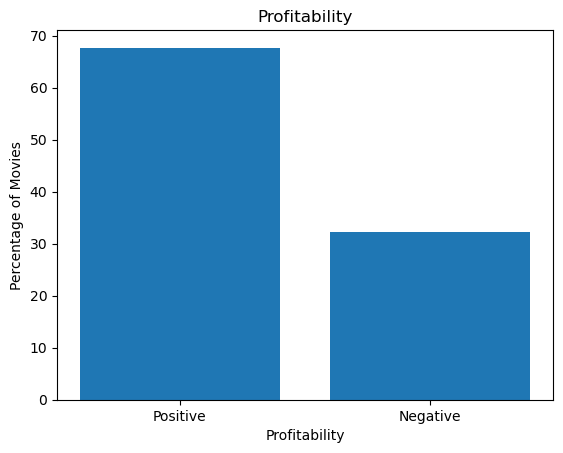

In [34]:
profit_prop = df['profitability'].value_counts(normalize=True) * 100

# Plot the distribution of profitability in the train data
plt.bar(["Positive","Negative"],height=profit_prop)
plt.xlabel('Profitability')
plt.ylabel('Percentage of Movies')
plt.title('Profitability')

plt.show()

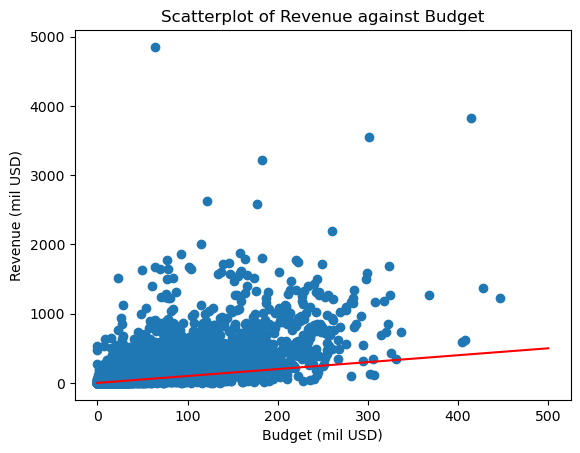

In [96]:
plt.plot([0,500], [0,500], 'r')
plt.scatter(x=df['budget_adj']/1000000, y=df['revenue_adj']/1000000)
plt.xlabel('Budget (mil USD)')
plt.ylabel('Revenue (mil USD)')
plt.title('Scatterplot of Revenue against Budget')
plt.show()

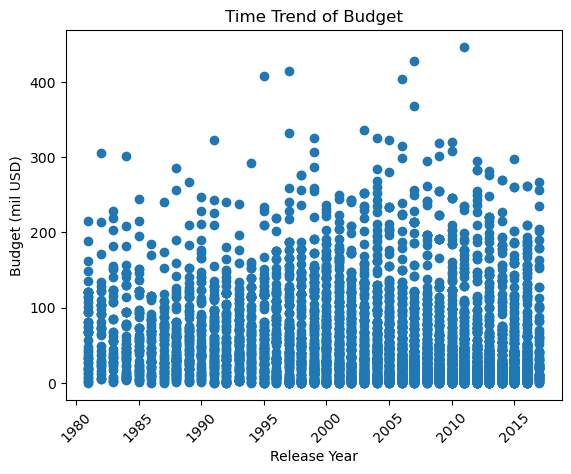

In [99]:
plt.scatter(df['year'], df['budget_adj']/1000000)
plt.xlabel('Release Year')
plt.ylabel('Budget (mil USD)')
plt.title('Time Trend of Budget')
plt.xticks(rotation=45)
plt.show()

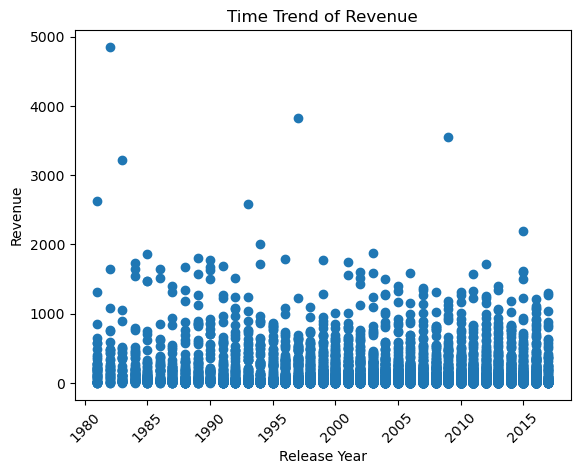

In [100]:
plt.scatter(df['year'], df['revenue_adj']/1000000)
plt.xlabel('Release Year')
plt.ylabel('Revenue')
plt.title('Time Trend of Revenue')
plt.xticks(rotation=45)
plt.show()

In [109]:
genre_props = df[['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
                  'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Thriller', 'War', 'Western']].sum()
genre_props.sort_values(inplace=True)

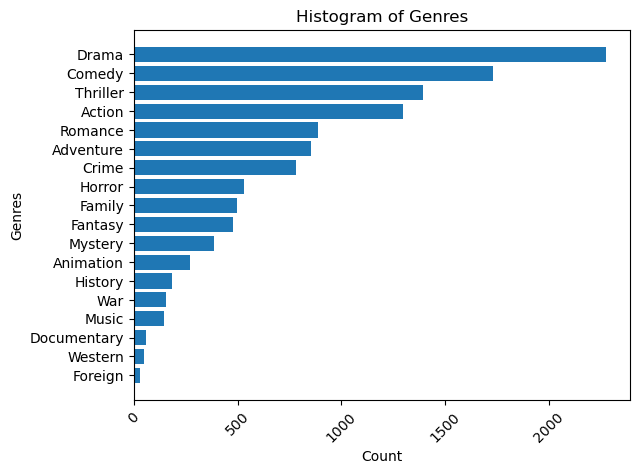

In [110]:
plt.barh(genre_props.index, genre_props.values)
plt.xlabel('Count')
plt.ylabel('Genres')
plt.title('Histogram of Genres')
plt.xticks(rotation=45)
plt.show()

In [16]:
df['topic'] = pd.from_dummies(df[['Topic_Topic 1', 'Topic_Topic 2', 'Topic_Topic 3', 'Topic_Topic 4', 'Topic_Topic 5', 
                                  'Topic_Topic 6', 'Topic_Topic 7', 'Topic_Topic 8', 'Topic_Topic 9', 'Topic_Topic 10']], 
                              sep="Topic_")
df['log_budget_adj'] = df['budget_adj'].apply(lambda x: np.log10(x+1))
df['log_revenue_adj'] = df['revenue_adj'].apply(lambda x: np.log10(x+1))

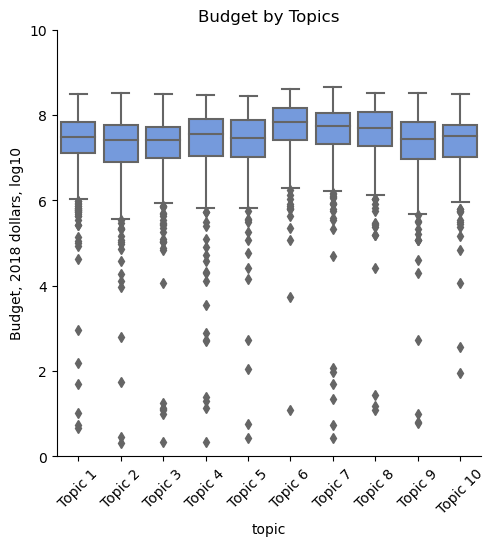

In [59]:
sns.catplot(data = df, x="topic", y="log_budget_adj", kind="box", color="cornflowerblue",
            order=['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7', 'Topic 8', 'Topic 9', 'Topic 10'])
plt.xticks(rotation=45)
plt.ylabel("Budget, 2018 dollars, log10")
plt.title("Budget by Topics")
plt.ylim(0, 10)
plt.show()

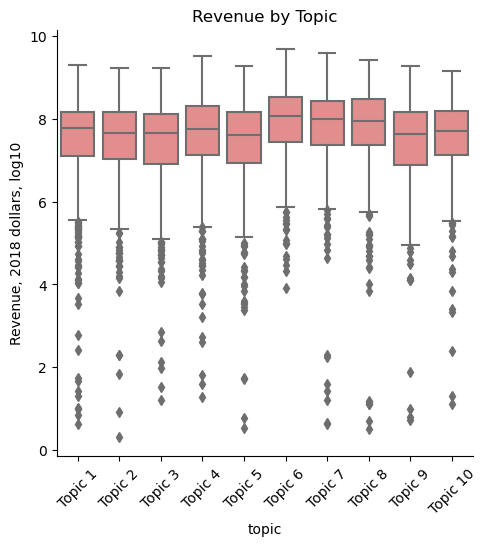

In [60]:
sns.catplot(data = df, x="topic", y="log_revenue_adj", kind="box", color="lightcoral",
            order=['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7', 'Topic 8', 'Topic 9', 'Topic 10'])
plt.xticks(rotation=45)
plt.ylabel("Revenue, 2018 dollars, log10")
plt.title("Revenue by Topic")
plt.show()

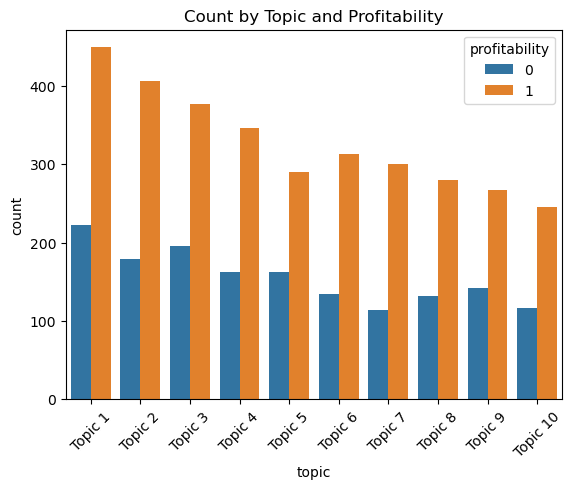

In [62]:
sns.countplot(data = df, x="topic", hue="profitability", order=['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 
                                                                     'Topic 6', 'Topic 7', 'Topic 8', 'Topic 9', 'Topic 10'])
plt.title("Count by Topic and Profitability")
plt.xticks(rotation=45)
plt.show()

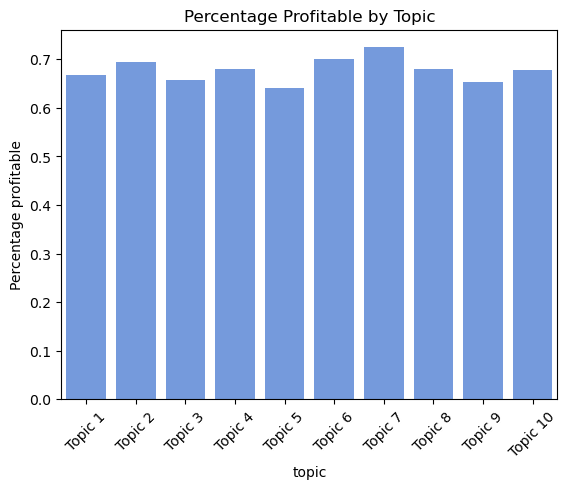

In [66]:
topic_profit = df[df['profitability']==1]['topic'].value_counts() /df['topic'].value_counts()

ax= sns.barplot(x=topic_profit.index, y=topic_profit.values, color="cornflowerblue", 
            order=['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7', 'Topic 8', 'Topic 9', 'Topic 10'])

plt.xticks(rotation=45)
plt.ylabel("Percentage profitable")
plt.title('Percentage Profitable by Topic')
plt.show()

In [84]:
topic_genre = df.groupby(by=['topic'])[['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
                                        'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Thriller', 
                                        'War', 'Western']].sum()
topic_genre.reset_index(inplace=True)
topic_genre_long = topic_genre.melt(id_vars=['topic'], var_name = 'genre', value_name = 'count')
topic_genre_long


,topic,genre,count
0,Topic 1,Action,192
1,Topic 10,Action,54
2,Topic 2,Action,61
3,Topic 3,Action,69
4,Topic 4,Action,161
...,...,...,...
175,Topic 5,Western,6
176,Topic 6,Western,4
177,Topic 7,Western,6
178,Topic 8,Western,7


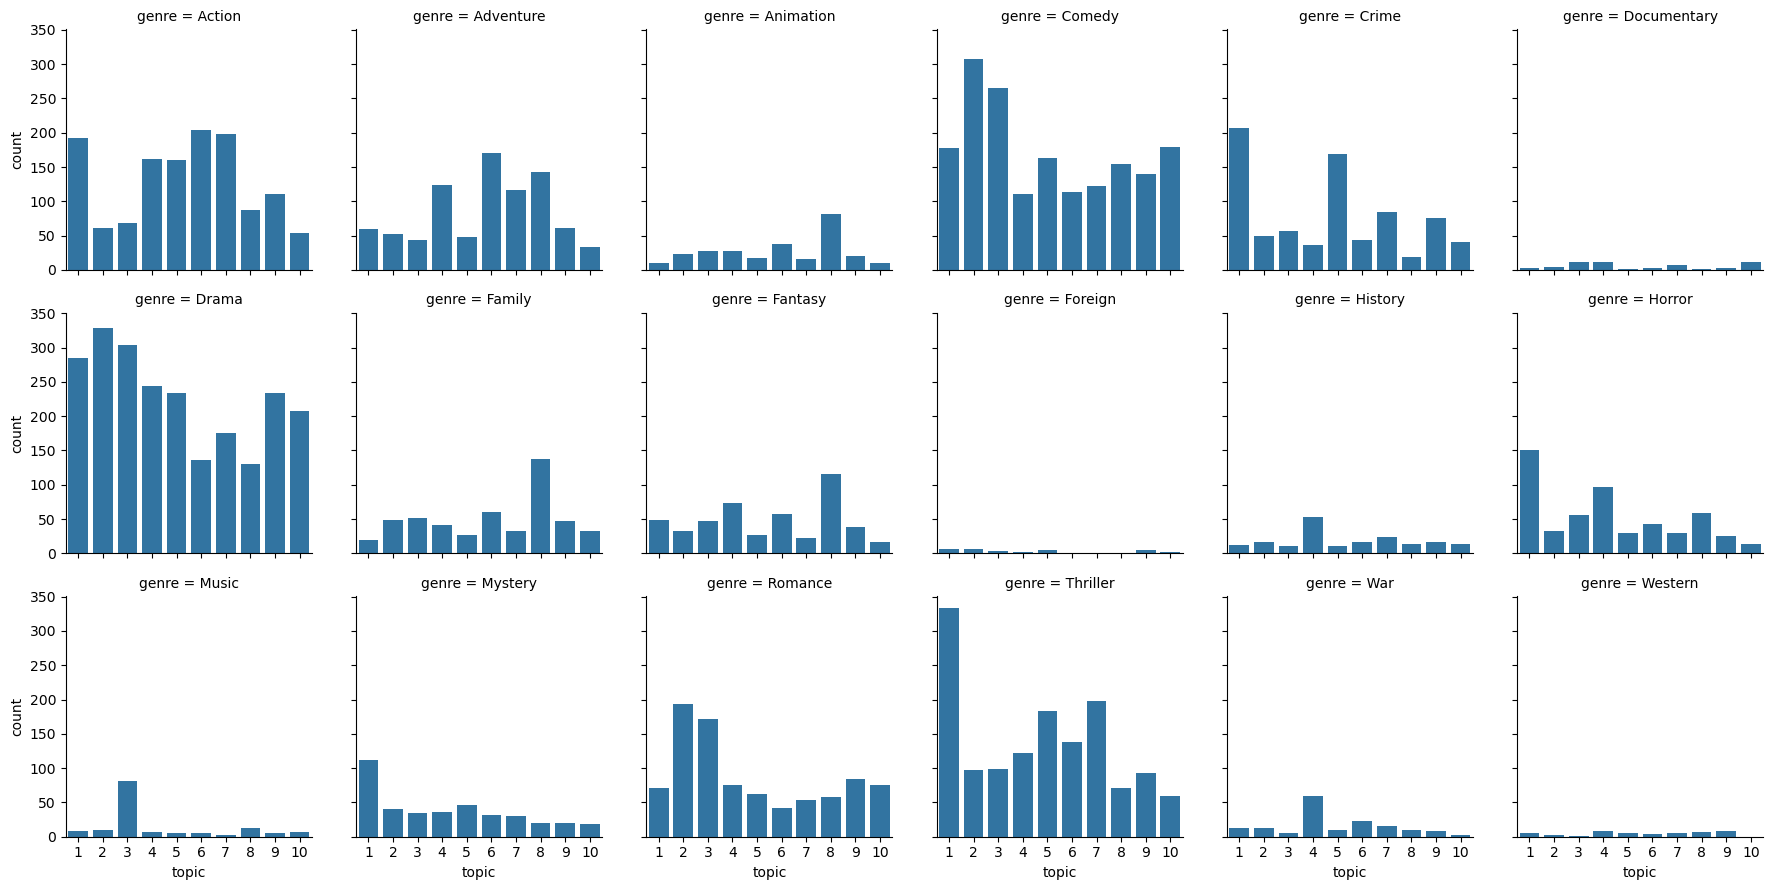

In [95]:
g = sns.FacetGrid(topic_genre_long, col="genre", col_wrap=6)
g.map(sns.barplot, "topic", "count", order=['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7', 
                                            'Topic 8', 'Topic 9', 'Topic 10'])

g.set_xticklabels(labels = range(1,11))